In [1]:
!pip install extensisq

You should consider upgrading via the 'C:\Users\Daminov\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, series, evaluate, lambdify, sqrt,\
                  Matrix, Rational, dsolve, pprint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from extensisq import Pri6, Pri7, Pri8, Pr9
init_printing()

а)	построить фазовый портрет и нарисовать траектории для двух начальных условий;

б)	найти особые точки и проанализировать их  устойчивость с помощью фазового портрета;


1. $\left\{\begin{aligned}\dot x&=1-x^2,\\ \dot y&=y^2.\end{aligned}  \right. $

In [2]:
x, y = symbols("x y",real=True)
Sys1_rhs = [1 - x**2, y**2]
# Находим стационарные точки
SP1 = solve(Sys1_rhs,[x,y])
SP1x=np.array([x for x,y in SP1])
SP1y=np.array([y for x,y in SP1])
SP1

In [3]:
xmin,xmax = -6,6
ymin,ymax = -6,6
X1, Y1 = np.meshgrid(np.linspace(xmin, xmax, 30), np.linspace(ymin, ymax, 30))
dotx1 = sym.lambdify([x,y],Sys1_rhs[0],'numpy')
dotx2 = sym.lambdify([x,y],Sys1_rhs[1],'numpy')

dx1 = dotx1(X1,Y1)
dy1 = dotx2(X1,Y1)

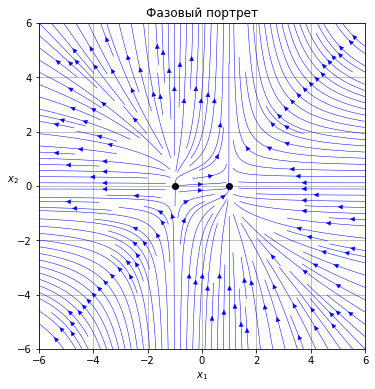

In [4]:
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(SP1x,SP1y,'ko')
ax2.streamplot(X1, Y1, dx1, dy1, color='b', linewidth=0.5, density=1.8)
ax2.axis('square')
ax2.axis([xmin, xmax, ymin, ymax])
ax2.grid()
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$",rotation=False)
ax2.set_title("Фазовый портрет")
plt.show()

In [5]:
# Правая часть системы
def dX1dt(t,X,a=1):
    return np.array([dotx(*X) for dotx in [dotx1,dotx2]],dtype=np.float64)

In [6]:
tend = 25
icsX0=[-1.004,0.3]
# Численно считаем фазовую траекторию для начального условия 1
solSys1 = solve_ivp(dX1dt,(0,tend),icsX0,method=Pr9,dense_output=True,rtol=1e-12,atol=1e-12)
tdiap = np.linspace(0,tend,1000)
solX1=solSys1.sol(tdiap)
solSys1.y.size,solX1.size

In [7]:
tend = 25
icsX1=[0.5,-3.0]
# Численно считаем фазовую траекторию для начального условия 2
solSys2 = solve_ivp(dX1dt,(0,tend),icsX1,method=Pr9,dense_output=True,rtol=1e-12,atol=1e-12)
tdiap = np.linspace(0,tend,1000)
solX2=solSys2.sol(tdiap)
solSys2.y.size,solX2.size

In [8]:
tend = 25
icsX2=[-1,-2]
# Численно считаем фазовую траекторию для начального условия 2
solSys3 = solve_ivp(dX1dt,(0,tend),icsX2,method=Pr9,dense_output=True,rtol=1e-12,atol=1e-12)
tdiap = np.linspace(0,tend,1000)
solX3=solSys3.sol(tdiap)
solSys3.y.size,solX3.size

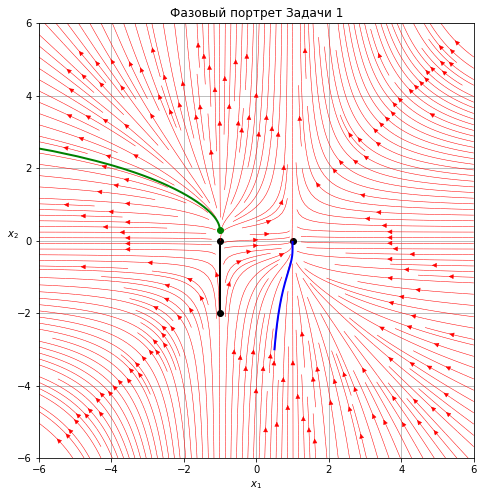

In [9]:
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.axis('square')
ax1.axis([xmin, xmax, ymin, ymax])
ax1.grid()
ax1.plot(SP1x,SP1y,'ko')
ax1.streamplot(X1, Y1, dx1, dy1, color='r', linewidth=0.5, density=2.6)

ax1.plot(icsX0[0],icsX0[1],'go',lw=2)
ax1.plot(solX1[0],solX1[1],'g-',lw=2)

ax1.plot(solX2[0],solX2[1],'b-',lw=2)

ax1.plot(icsX2[0],icsX2[1],'ko',lw=2)
ax1.plot(solX3[0],solX3[1],'k-',lw=2)

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$",rotation=False)
ax1.set_title("Фазовый портрет Задачи 1")
plt.show()

Полученные две особые точки неустойчивы.